<a href="https://colab.research.google.com/github/falawar7/AAI614_ELAWAR/blob/main/Week4/FE_project1_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Your Task**

In 1995 Kohavi and Becker extracted and cleaned [this](https://archive.ics.uci.edu/dataset/2/adult) data from the 1994 US Census. It went on to be used as a benchmark dataset for many papers. In this project, we will work with this dataset to explore patterns of income and consider how time and location may alter or confound these relationships.


This assignment is to be completed individually. To submit this assignment, submit the following two files to Blackboard or share them with haidar@ieee.org by the due date:



*   **A notebook that contains your code and answers.**
*   **A simple 1-2 page report on your own linear regression analysis with the census dataset as explained later in the project.**


# **Data Analysis**
Use section headers or comments in your notebook to indicate which pieces of code correspond to which question.



**Data exploration**



1.   Check the columns of your data. Are they the expected data types based on their descriptions in this text file description of the data?
2.   How are missing values represented in this data? Cast missing values to **np.nan**, if necessary. Count the number of missing values in each column.
3.   Individually plot the distributions of **capital_gain** and **capital_loss**. Do you think these variables should be transformed into categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).
4.   The sampling weights in the dataset are contained in the variable **fnlwgt**. The weights indicate the share of the population that the sample represents based on location (and sometimes, other factors). More information is provided in this text file description of the data.
5.   Plot or numerically explore the distribution of **fnlwgt**. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the **fnlwgt** values for those you deem to be outliers as missing for the remainder of your analyses.



**Correlation**

Find the correlations between age, **education_num**, and **hours_per_week**.



1.   Do any of the variables appear to be correlated? How did you make your assessment?
2.   Statistically test any variable pairs with a correlation coefficient **> |0.1|** for its difference from 0 and report your result. Is the direction and significance of your finding as expected?
3.  How does the correlation (and its significance) between **education_num** and age compare between male and female participants? Is this expected?
4.   Compute the covariance matrix for **education_num** and **hours_per_week**. What conclusions can you draw from the covariance matrix?






## **A. Data exploration**

**Importing Adult form the Link**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
!pip install ucimlrepo

In [37]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [188]:
print(X.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


In [187]:
print(y.columns)

Index(['income'], dtype='object')


In [189]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [62]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [191]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [ ]:
y.shape

(48842, 1)

In [ ]:
X.shape

(48842, 14)

In [ ]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


# **1. Check the columns of your data. Are they the expected data types based on their descriptions in this text file description of the data?**

In [38]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets

adult_combined = pd.concat([X, y], axis=1)
adult_combined.columns = list(X.columns) + ['income']

print(adult_combined.head())


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [39]:
adult_combined.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
adult_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
adult_combined.shape

(48842, 15)

In [ ]:
income_values = adult_combined['income'].unique()

In [ ]:
income_values

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

**Validated Same as the DEscription from the URL**

# **2.How are missing values represented in this data? Cast missing values to np.nan, if necessary. Count the number of missing values in each column.**

In [5]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

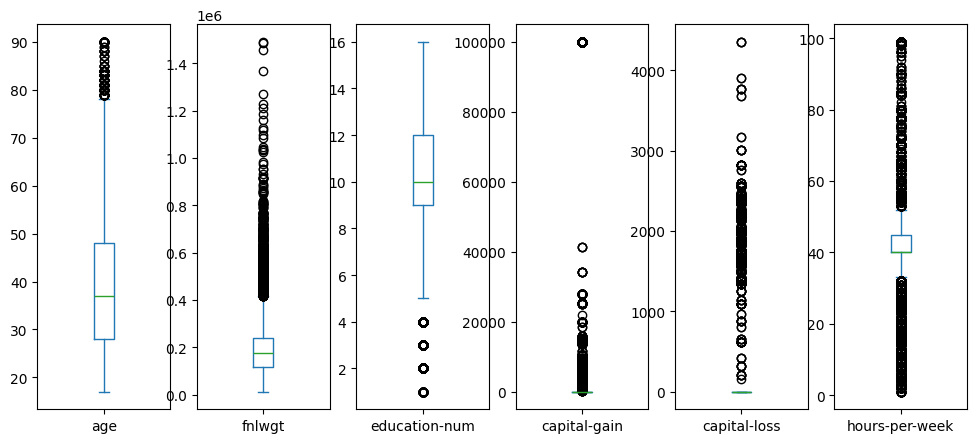

In [11]:
import matplotlib.pyplot as plt
adult_combined.plot(kind = 'box', subplots = True, figsize = (12, 5))
plt.show()

In [12]:
adult_combined


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [13]:
adult_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# **2.1 Missing Values**

In [114]:
missing_values = adult_combined.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [15]:
# Count the number of non-null entries
count_non_null = adult_combined['occupation'].count()

# Print the result
print("Non-null count:", count_non_null)


Non-null count: 47876


In [ ]:
unique_values_workclass = adult_combined['workclass'].value_counts()
print(unique_values_workclass)

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [ ]:
unique_values_occupation = adult_combined['occupation'].value_counts()
print(unique_values_occupation)


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
unique_values_nativecountry = adult_combined['native-country'].value_counts()
print(unique_values_nativecountry)

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [ ]:
native_country_values = adult_combined['native-country'].unique()

In [ ]:
native_country_values

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

In [16]:
workclass_unique_values = adult_combined['workclass'].unique()
occupation_unique_values = adult_combined['occupation'].unique()
native_country_unique_values = adult_combined['native-country'].unique()

num_unique_workclass = len(workclass_unique_values)
num_unique_occupation = len(occupation_unique_values)
num_unique_native_country = len(native_country_unique_values)

# Print the results
print(f"Number of unique values in 'workclass': {num_unique_workclass}")
print(f"Number of unique values in 'occupation': {num_unique_occupation}")
print(f"Number of unique values in 'native-country': {num_unique_native_country}")

Number of unique values in 'workclass': 10
Number of unique values in 'occupation': 16
Number of unique values in 'native-country': 43


In [17]:
unique_counts = adult_combined.nunique()

# Print the result
print("Number of unique values for each column:")
print(unique_counts)

Number of unique values for each column:
age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64


In [11]:
missing_values = adult_combined.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


**Answer For Question 1**

<font color="red"><b>Before Casting with np.nan</b></font>**

- **workclass:** have <font color="red"><b>963</b></font> Missing values
- **occupation:** have <font color="red"><b>966</b></font> Missing values
- **native-country:** have <font color="red"><b>274</b></font> Missing values

<font color="red"><b>After Casting with np.nan</b></font>

- **workclass:** have <font color="red"><b>2799</b></font> Missing values
- **occupation:** have <font color="red"><b>2809</b></font> Missing values
- **native-country:** have <font color="red"><b>857</b></font> Missing values

# **2.2 Cast missing values to np.nan, if necessary.**

In [20]:
native_country_counts = adult_combined['workclass'].value_counts()

print("Unique values and their counts in 'workclass':")
print(native_country_counts)

Unique values and their counts in 'workclass':
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [21]:
native_country_counts = adult_combined['occupation'].value_counts()

print("Unique values and their counts in 'occupation':")
print(native_country_counts)

Unique values and their counts in 'occupation':
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
native_country_counts = adult_combined['occupation'].value_counts()

print("Unique values and their counts in 'occupation':")
print(native_country_counts)

Unique values and their counts in 'occupation':
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [ ]:
native_country_counts = adult_combined['native-country'].value_counts()

print("Unique values and their counts in 'native-country':")
print(native_country_counts)

Unique values and their counts in 'native-country':
native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           

In [41]:
#Handle missing values (replace '?' with np.nan)
import numpy as np
adult_combined.replace('?', np.nan, inplace=True)
missing_values = adult_combined.isnull().sum()

In [42]:
missing_values = adult_combined.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


In [43]:
adult_combined.fillna('NaN', inplace=True)

In [44]:
missing_values = adult_combined.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [16]:
native_country_counts = adult_combined['workclass'].value_counts()

print("Unique values and their counts in 'workclass':")
print(native_country_counts)

Unique values and their counts in 'workclass':
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NaN                  2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


<font color="red"><b>After Casting with np.nan</b></font>

- **workclass:** have <font color="red"><b>2799</b></font> Missing values
- **occupation:** have <font color="red"><b>2809</b></font> Missing values
- **native-country:** have <font color="red"><b>857</b></font> Missing values

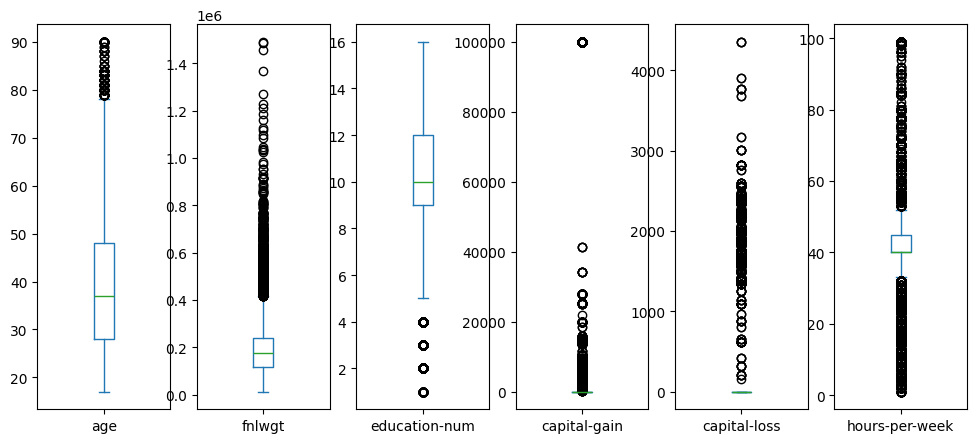

In [ ]:
import matplotlib.pyplot as plt
adult_combined.plot(kind = 'box', subplots = True, figsize = (12, 5))
plt.show()

# Question3
**3. Individually plot the distributions of capital_gain and capital_loss. Do you think these variables should be transformed into categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).**

In [26]:
capital_gain_counts = adult_combined['capital-gain'].value_counts()
capital_gain_counts

,count
capital-gain,
0,44807
15024,513
7688,410
7298,364
99999,244
...,...
2387,1
1111,1
7262,1


In [ ]:
capital_loss_counts = adult_combined['capital-loss'].value_counts()
capital_loss_counts

,count
capital-loss,
0,46560
1902,304
1977,253
1887,233
2415,72
...,...
1539,1
1870,1
1911,1


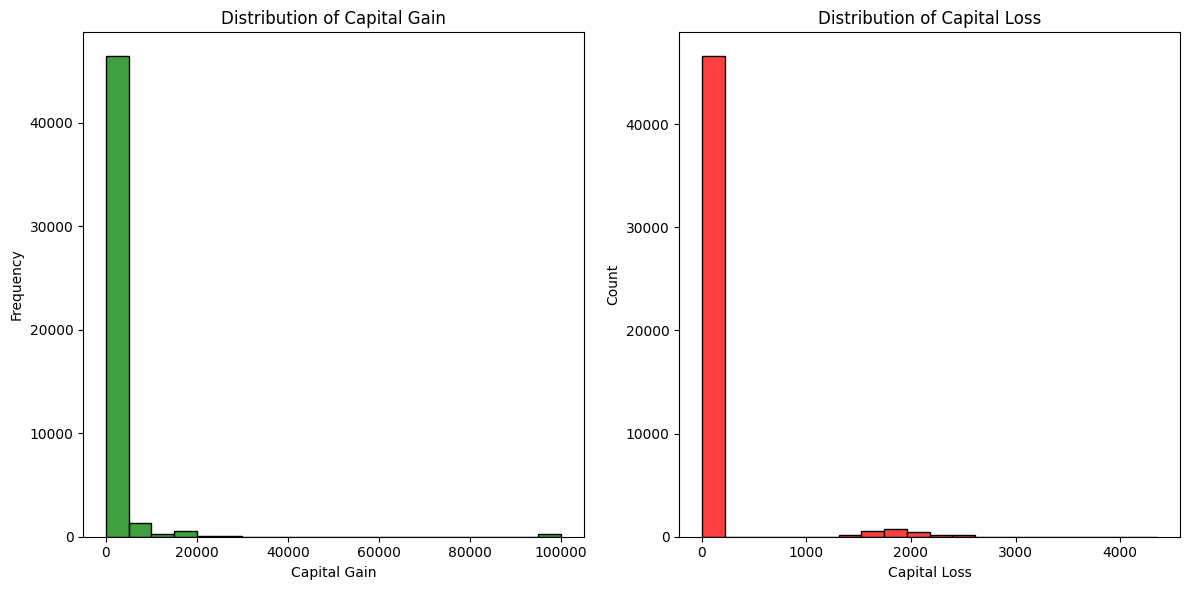

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))

# Plot distribution of 'capital-gain'
plt.subplot(1, 2, 1)
sns.histplot(adult_combined['capital-gain'], bins=20, color='green')
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')

# Plot distribution of 'capital-loss'
plt.subplot(1, 2, 2)
sns.histplot(adult_combined['capital-loss'], bins=20, color='red')
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()

In [45]:
capital_gain = adult_combined['capital-gain']

#Set to  <= 0 as 'No Gain' and > 0 as 'Gain'
capital_gain_bins = [-np.inf, 0, np.inf]

capital_gain_labels = ['No Capital Gain', 'Capital Gain']

capital_gain_category = pd.cut(capital_gain, bins=capital_gain_bins, labels=capital_gain_labels, right=True)
adult_combined['capital_gain_category'] = capital_gain_category

print(capital_gain_category)

0           Capital Gain
1        No Capital Gain
2        No Capital Gain
3        No Capital Gain
4        No Capital Gain
              ...       
48837    No Capital Gain
48838    No Capital Gain
48839    No Capital Gain
48840       Capital Gain
48841    No Capital Gain
Name: capital-gain, Length: 48842, dtype: category
Categories (2, object): ['No Capital Gain' < 'Capital Gain']


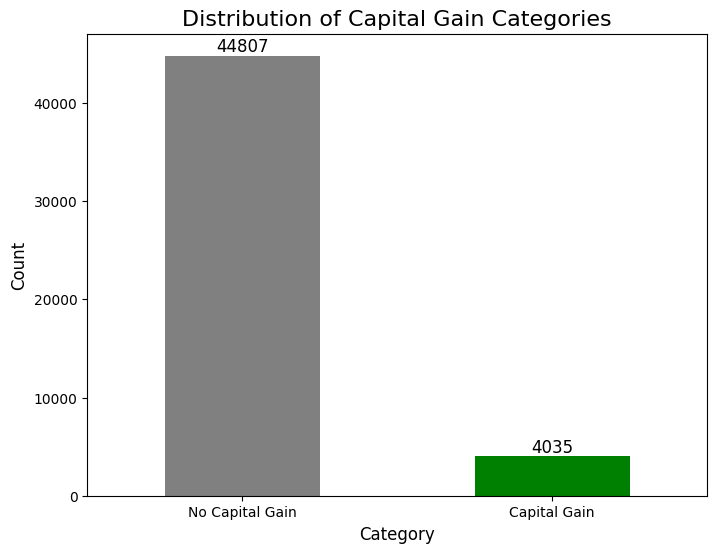

In [ ]:
plt.figure(figsize=(8, 6))
ax = adult_combined['capital_gain_category'].value_counts().plot(kind='bar', color=['grey', 'green'])

# Add labels and title
plt.title('Distribution of Capital Gain Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Keep the x-ticks horizontal

# Add value counts on top of the bars
for i, v in enumerate(adult_combined['capital_gain_category'].value_counts()):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


In [46]:
capital_loss = adult_combined['capital-loss']

#set to  <= 0 as 'No Loss Gain' and > 0 as 'Loss Gain'
capital_loss_bins = [-np.inf, 0, np.inf]

capital_loss_labels = ['No Capital loss', 'Capital loss']

capital_loss_category = pd.cut(capital_loss, bins=capital_loss_bins, labels=capital_loss_labels, right=True)
adult_combined['capital_loss_category'] = capital_loss_category
print(capital_loss_category)

0        No Capital loss
1        No Capital loss
2        No Capital loss
3        No Capital loss
4        No Capital loss
              ...       
48837    No Capital loss
48838    No Capital loss
48839    No Capital loss
48840    No Capital loss
48841    No Capital loss
Name: capital-loss, Length: 48842, dtype: category
Categories (2, object): ['No Capital loss' < 'Capital loss']


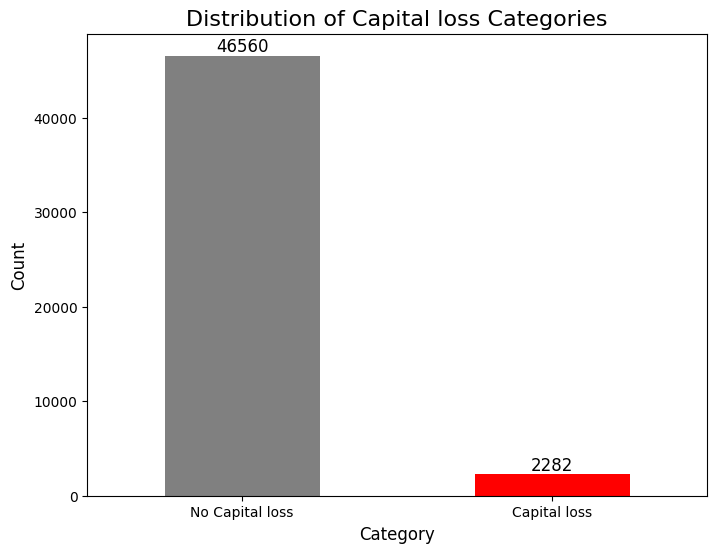

In [ ]:
plt.figure(figsize=(8, 6))
ax = adult_combined['capital_loss_category'].value_counts().plot(kind='bar', color=['grey', 'red'])

# Add labels and title
plt.title('Distribution of Capital loss Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Keep the x-ticks horizontal

# Add value counts on top of the bars
for i, v in enumerate(adult_combined['capital_loss_category'].value_counts()):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


In [13]:
adult_combined.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_gain_category,capital_loss_category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Capital Gain,No Capital loss
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,No Capital Gain,No Capital loss
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,No Capital Gain,No Capital loss
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,No Capital Gain,No Capital loss
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,No Capital Gain,No Capital loss


In [ ]:
capital_gain_category.value_counts()

,count
capital-gain,
No Capital Gain,44807
Capital Gain,4035


In [ ]:
capital_loss_category.value_counts()

,count
capital-loss,
No Capital loss,46560
Capital loss,2282


## **Question 4 and Question 5 Combined**

4.   The sampling weights in the dataset are contained in the variable **fnlwgt**. The weights indicate the share of the population that the sample represents based on location (and sometimes, other factors). More information is provided in this text file description of the data.

**Answer for Question 4:**

Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions:

((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Plotted the fnlwgt represented in native-COuntry with Mean and Count
as for Mean
we can See an Aver

In [ ]:
adult_combined.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_gain_category,capital_loss_category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Capital Gain,No Capital loss
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,No Capital Gain,No Capital loss
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,No Capital Gain,No Capital loss
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,No Capital Gain,No Capital loss
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,No Capital Gain,No Capital loss


In [201]:
fnlwgt_native_combined_count = adult_combined.groupby('native-country')['fnlwgt'].count()
print(fnlwgt_native_combined_count)

native-country
Cambodia                         28
Canada                          182
China                           122
Columbia                         85
Cuba                            138
Dominican-Republic              103
Ecuador                          45
El-Salvador                     155
England                         127
France                           38
Germany                         206
Greece                           49
Guatemala                        88
Haiti                            75
Holand-Netherlands                1
Honduras                         20
Hong                             30
Hungary                          19
India                           151
Iran                             59
Ireland                          37
Italy                           105
Jamaica                         106
Japan                            92
Laos                             23
Mexico                          951
NaN                             857
Nicaragua    

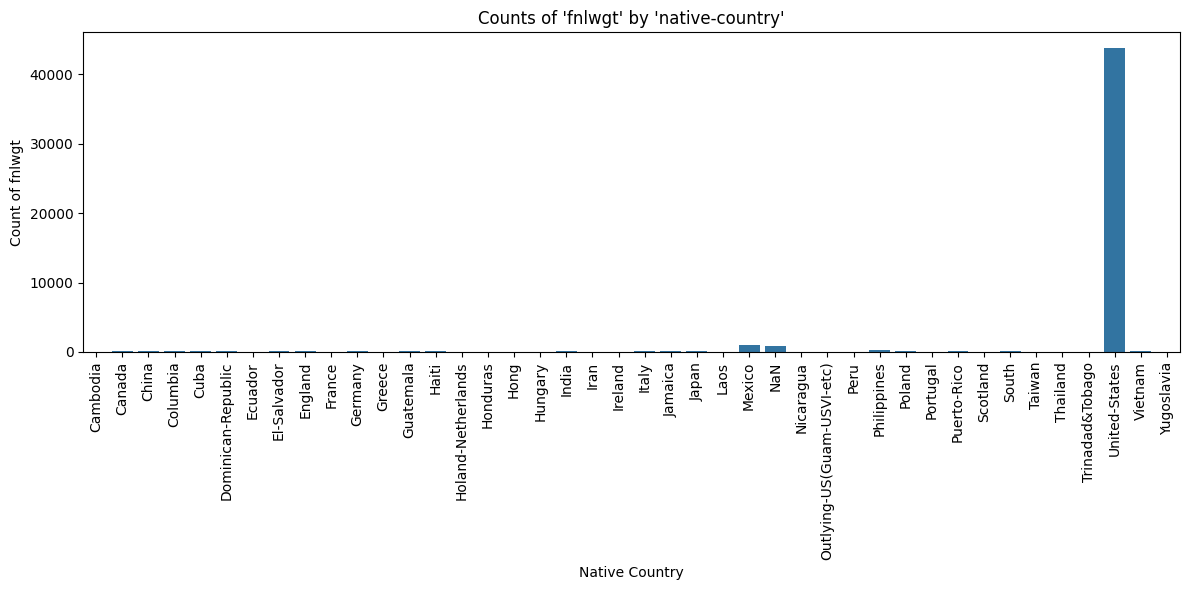

In [32]:
fnlwgt_native_combined_count = fnlwgt_native_combined_count.reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=fnlwgt_native_combined_count, x='native-country', y='count')

plt.xticks(rotation=90)
plt.title("Counts of 'fnlwgt' by 'native-country'")
plt.xlabel("Native Country")
plt.ylabel("Count of fnlwgt")
plt.tight_layout()
plt.show()


In [41]:
fnlwgt_native_combined_count.describe()

,count
count,42.000000
mean,1162.904762
std,6747.172806
min,1.000000
25%,31.750000
50%,80.000000
75%,125.750000
max,43832.000000


In [122]:
fnlwgt_native_combined_mean = adult_combined.groupby('native-country')['fnlwgt'].mean()
print(fnlwgt_native_combined_mean)

native-country
Cambodia                      200296.142857
Canada                        181262.406593
China                         172780.385246
Columbia                      217853.647059
Cuba                          240603.449275
Dominican-Republic            203678.854369
Ecuador                       178576.777778
El-Salvador                   250671.741935
England                       183573.094488
France                        186503.605263
Germany                       192997.485437
Greece                        150477.959184
Guatemala                     256355.204545
Haiti                         217718.386667
Holand-Netherlands             27882.000000
Honduras                      239431.250000
Hong                          212912.100000
Hungary                       198379.684211
India                         165606.046358
Iran                          193843.983051
Ireland                       146093.675676
Italy                         179078.790476
Jamaica          

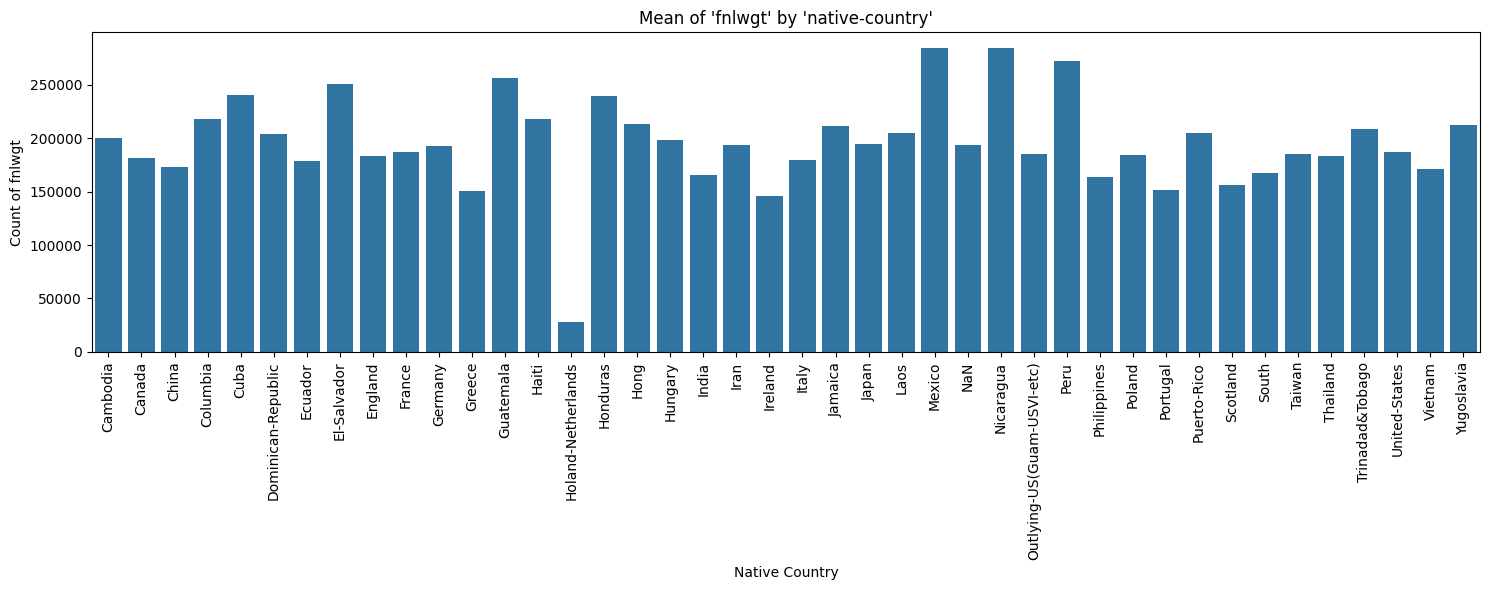

In [43]:
fnlwgt_native_combined_mean = fnlwgt_native_combined_mean.reset_index(name='mean')

plt.figure(figsize=(15, 6))
sns.barplot(data=fnlwgt_native_combined_mean, x='native-country', y='mean')

plt.xticks(rotation=90)
plt.title("Mean of 'fnlwgt' by 'native-country'")
plt.xlabel("Native Country")
plt.ylabel("Count of fnlwgt")
plt.tight_layout()
plt.show()


In [44]:
fnlwgt_native_combined_mean.describe()

,mean
count,42.000000
mean,195252.967027
std,43090.741259
min,27882.000000
25%,178702.280952
50%,193294.553687
75%,212238.188782
max,284620.244898


In [45]:
fnlwgt_native_combined_mean.max()

,0
native-country,Yugoslavia
mean,284620.244898


In [46]:
fnlwgt_native_combined_mean.min()

,0
native-country,Cambodia
mean,27882.0


In [47]:
adult_combined.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_gain_category,capital_loss_category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Capital Gain,No Capital loss
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,No Capital Gain,No Capital loss
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,No Capital Gain,No Capital loss
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,No Capital Gain,No Capital loss
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,No Capital Gain,No Capital loss



5.   Plot or numerically explore the distribution of **fnlwgt**. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the **fnlwgt** values for those you deem to be outliers as missing for the remainder of your analyses.









In [48]:
adult_combined["fnlwgt"].describe()

,fnlwgt
count,4.884200e+04
mean,1.896641e+05
std,1.056040e+05
min,1.228500e+04
25%,1.175505e+05
50%,1.781445e+05
75%,2.376420e+05
max,1.490400e+06


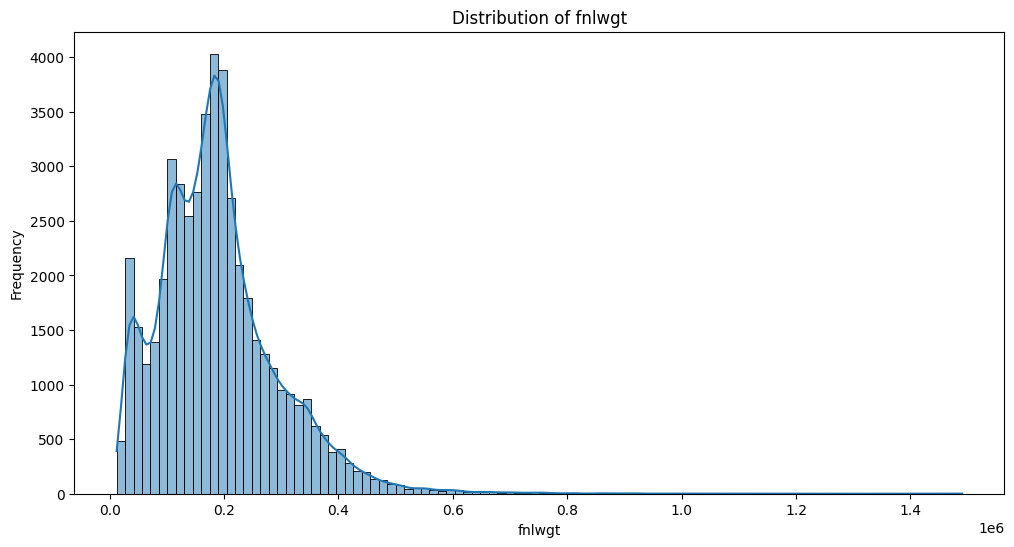

In [49]:
plt.figure(figsize=(12, 6))
sns.histplot(adult_combined['fnlwgt'], bins=100, kde=True)
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

In [50]:

skewness = adult_combined['fnlwgt'].skew()
print(f"Skewness of 'fnlwgt': {skewness}")

Skewness of 'fnlwgt': 1.4388918785218416


**Answer :
Based on the Histogram of fnlwgt the Skewed is not Symmetric , as it tends the tail to the right.
we verified as well by checking the skewness as it it 1.438 which is +ve meaning its skewed to the right**

***distribution of this fnlwgt between men and women***

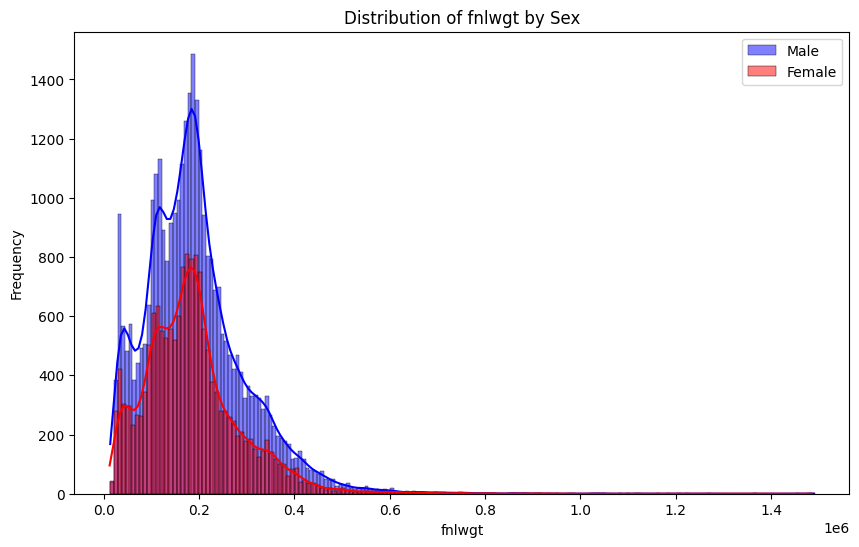

In [51]:
plt.figure(figsize=(10, 6))

# Plot for Male
sns.histplot(adult_combined[adult_combined['sex'] == 'Male']['fnlwgt'], kde=True, label='Male', color='blue')

# Plot for Female
sns.histplot(adult_combined[adult_combined['sex'] == 'Female']['fnlwgt'], kde=True, label='Female', color='red')

plt.title('Distribution of fnlwgt by Sex')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.legend()
plt.show()


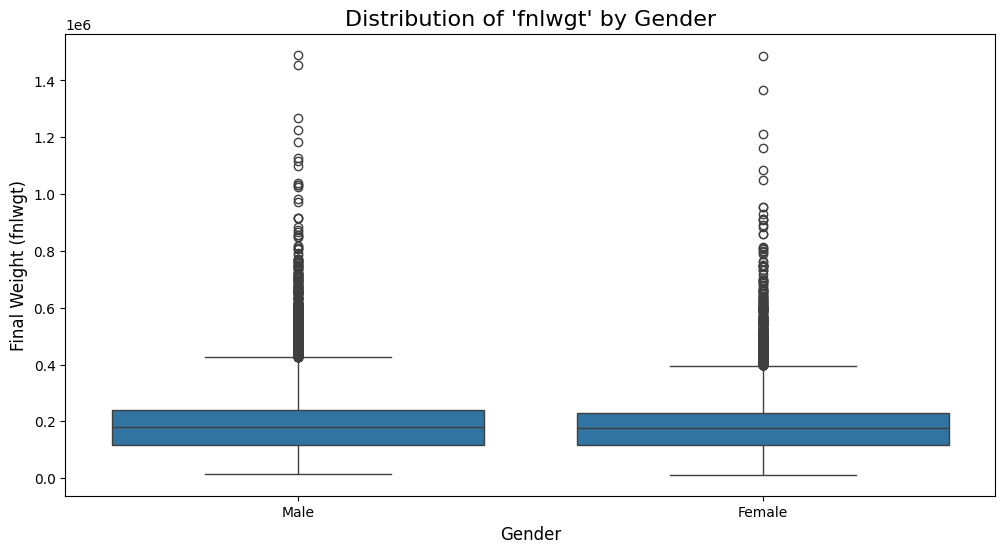

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='fnlwgt', data=adult_combined)
plt.title("Distribution of 'fnlwgt' by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Final Weight (fnlwgt)", fontsize=12)
plt.show()

After

In [53]:
adult_combined.groupby('sex')['fnlwgt'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,16192.0,185504.471714,103217.151490,12285.0,116560.0,175572.0,228609.25,1484705.0
Male,32650.0,191727.021623,106709.380155,13492.0,117963.0,180138.0,241722.50,1490400.0


In [14]:
male_mean = adult_combined[adult_combined['sex'] == 'Male']['fnlwgt'].mean()
print(f"mean fnlwgt for Male is: {male_mean}")
female_mean = adult_combined[adult_combined['sex'] == 'Female']['fnlwgt'].mean()
print(f"Median fnlwgt for Female is: {female_mean}")

mean fnlwgt for Male is: 191727.0216232772
Median fnlwgt for Female is: 185504.47171442688


Both **"Female"** and **"Male"** distributions are right-skewed, with a long tail to the right same as the Distribution of **fnlwgt**

In [15]:
adult_combined.groupby('sex')['fnlwgt'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,16192.0,185504.471714,103217.151490,12285.0,116560.0,175572.0,228609.25,1484705.0
Male,32650.0,191727.021623,106709.380155,13492.0,117963.0,180138.0,241722.50,1490400.0


In [17]:
difference = male_mean- female_mean
percentage_difference = round((difference / female_mean) * 100, 2)
print(f"The difference in mean fnlwgt between males and females is: {difference},Representing a :{percentage_difference}% ")

The difference in mean fnlwgt between males and females is: 6222.549908850313,Representing a :3.35% 


In [ ]:
#difference = male_median - female_median
#percentage_difference = round((difference / female_median) * 100, 2)
#print(f"The difference in median fnlwgt between males and females is: {difference},Representing a :{percentage_difference}% ")

The difference in median fnlwgt between males and females is: 4040.5,Representing a :2.35% 


The median of **"fnlwgt"** is **slightly higher** for **males** than for **females**. of **2.6 %**

**Removing the Outliers**

In [47]:
import numpy as np
import pandas as pd

def identify_outliers_IQR(data):
    """
    Identifies outliers using the IQR (Interquartile Range) method.

    Args:
        data: A pandas Series or numpy array representing a column of data.

    Returns:
        outliers: The values that are considered outliers.
        lower_bound: The lower bound for detecting outliers.
        upper_bound: The upper bound for detecting outliers.
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

def outliers(df, *cols):
    """
    Identifies outliers in the specified columns of a DataFrame using the IQR method.

    Args:
        df: The pandas DataFrame.
        *cols: The names of the columns to check for outliers.

    Returns:
        A pandas Index containing the indices of the outlier rows.
    """
    outlier_indices = set()

    for col in cols:
        outliers_IQR, _, _ = identify_outliers_IQR(df[col])
        # Get indices of outliers in this column
        col_outlier_indices = outliers_IQR.index
        # Add them to the overall set of outlier indices
        outlier_indices.update(col_outlier_indices)

    return pd.Index(list(outlier_indices))

#fnlwgt' column:
outlier_indices_fnlwgt = outliers(adult_combined, 'fnlwgt')
print(outlier_indices_fnlwgt)


Index([24577, 32778, 40979,  8219,  8227, 16420,    37,    40,  8237, 16435,
       ...
       24521, 32718, 24531, 40916, 40929, 40938, 32749, 24558, 24563, 24573],
      dtype='int64', length=1453)


In [48]:
outlier_indices_fnlwgt.shape

(1453,)

In [49]:
for i in outlier_indices_fnlwgt:
    adult_combined.loc[i, 'fnlwgt'] = np.nan

In [50]:
print(adult_combined['fnlwgt'].isna().sum())

1453


**Checcking if the outliers fro Validation**

In [51]:
import numpy as np
import pandas as pd

def identify_outliers_IQR(data):
    """
    Identifies outliers using the IQR (Interquartile Range) method.

    Args:
        data: A pandas Series or numpy array representing a column of data.

    Returns:
        outliers: The values that are considered outliers.
        lower_bound: The lower bound for detecting outliers.
        upper_bound: The upper bound for detecting outliers.
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

def outliers(df, *cols):
    """
    Identifies outliers in the specified columns of a DataFrame using the IQR method.

    Args:
        df: The pandas DataFrame.
        *cols: The names of the columns to check for outliers.

    Returns:
        A pandas Index containing the indices of the outlier rows.
    """
    outlier_indices = set()

    for col in cols:
        outliers_IQR, _, _ = identify_outliers_IQR(df[col])
        # Get indices of outliers in this column
        col_outlier_indices = outliers_IQR.index
        # Add them to the overall set of outlier indices
        outlier_indices.update(col_outlier_indices)

    return pd.Index(list(outlier_indices))

#fnlwgt' column:
outlier_indices_fnlwgt = outliers(adult_combined, 'fnlwgt')
print(outlier_indices_fnlwgt)


Index([], dtype='object')


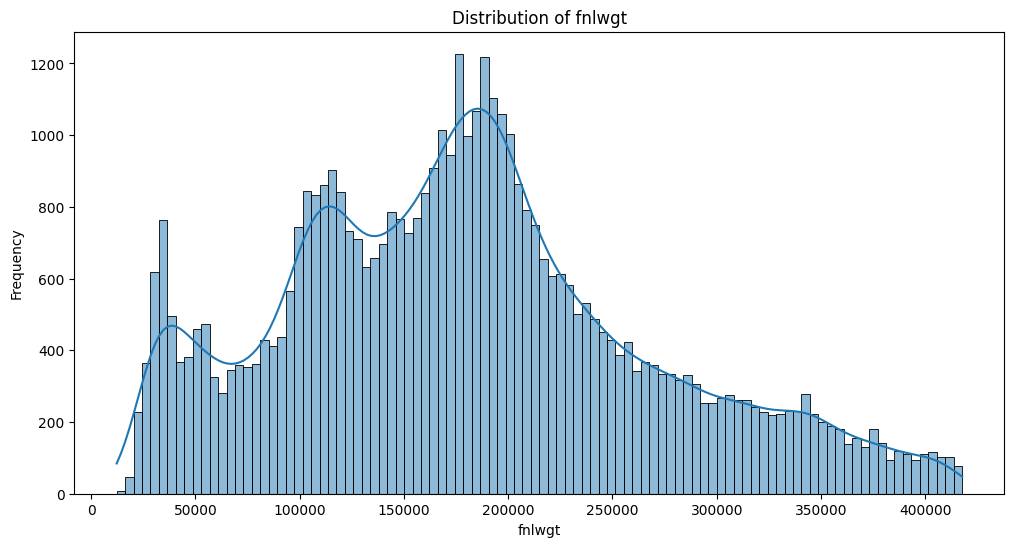

In [70]:
plt.figure(figsize=(12, 6))
sns.histplot(adult_combined['fnlwgt'], bins=100, kde=True)
plt.title('Distribution of fnlwgt')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.show()

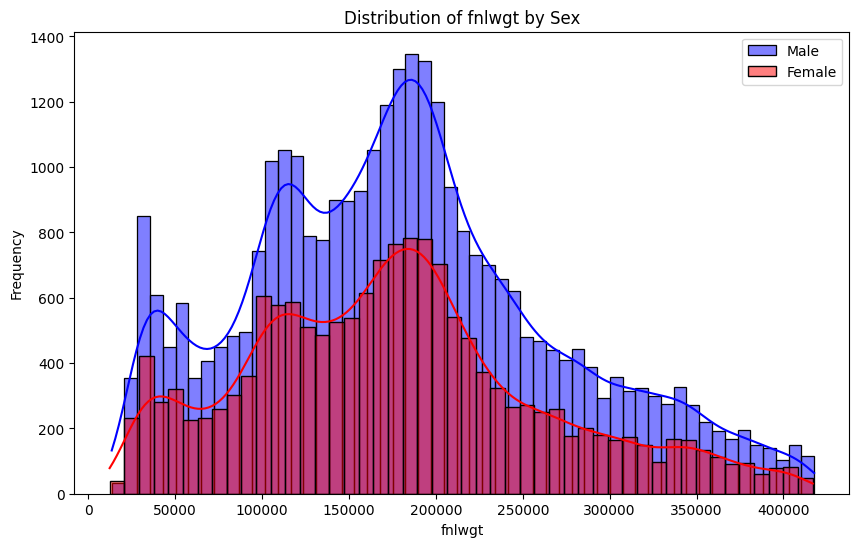

In [64]:
plt.figure(figsize=(10, 6))

# Plot for Male
sns.histplot(adult_combined[adult_combined['sex'] == 'Male']['fnlwgt'], kde=True, label='Male', color='blue')

# Plot for Female
sns.histplot(adult_combined[adult_combined['sex'] == 'Female']['fnlwgt'], kde=True, label='Female', color='red')

plt.title('Distribution of fnlwgt by Sex')
plt.xlabel('fnlwgt')
plt.ylabel('Frequency')
plt.legend()
plt.show()

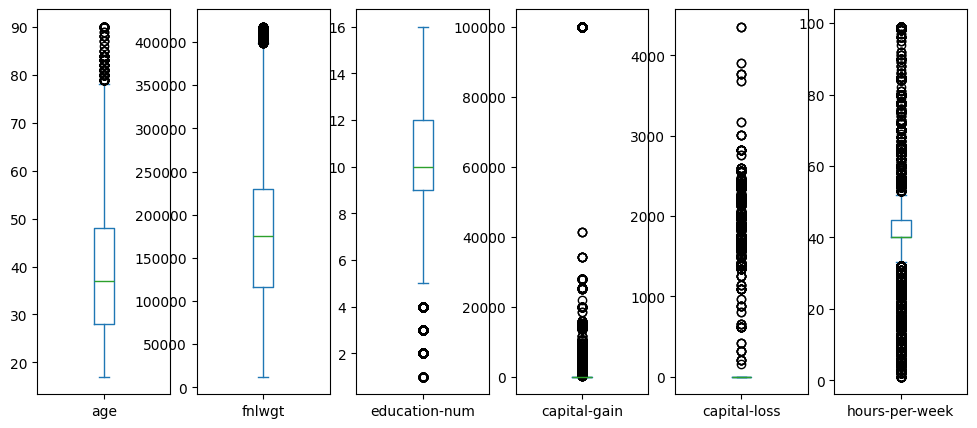

In [65]:
import matplotlib.pyplot as plt
adult_combined.plot(kind = 'box', subplots = True, figsize = (12, 5))
plt.show()

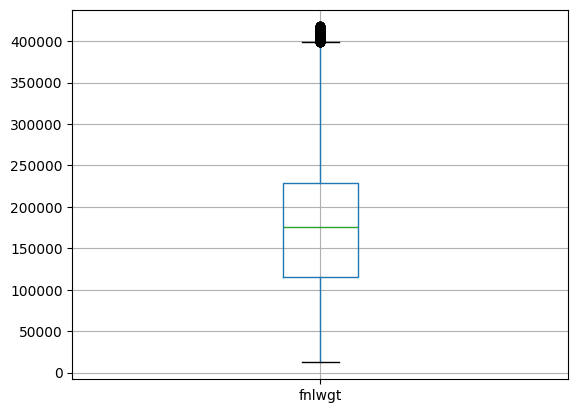

In [23]:
boxplot_new_fnlwgt = adult_combined.boxplot(column=['fnlwgt'])

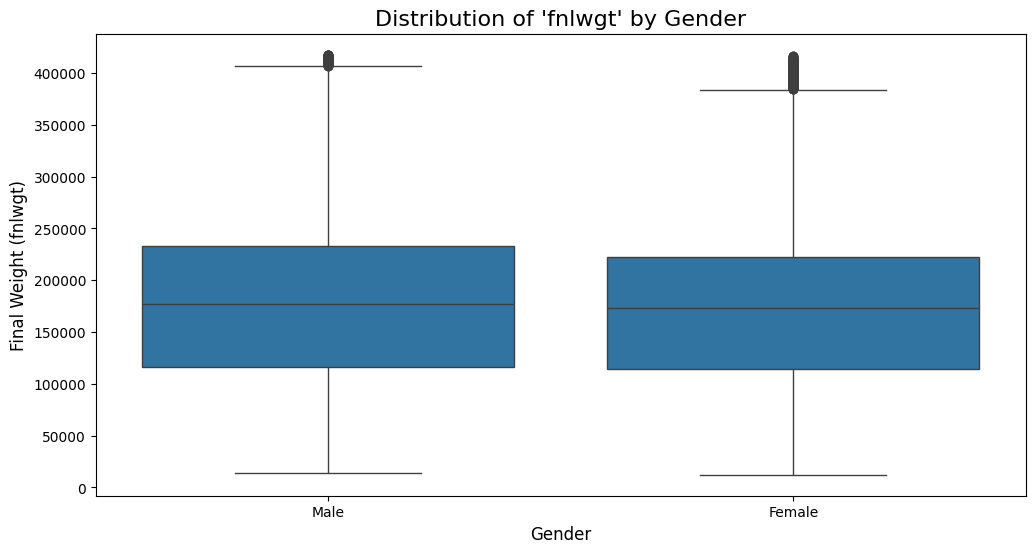

In [128]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='fnlwgt', data=adult_combined)
plt.title("Distribution of 'fnlwgt' by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Final Weight (fnlwgt)", fontsize=12)
plt.show()

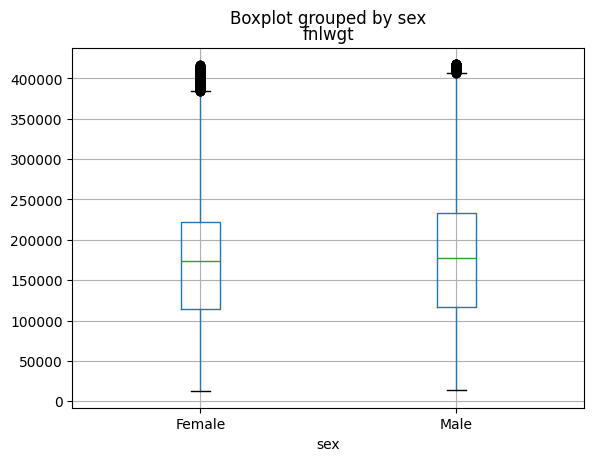

In [52]:
boxplot_new_fnlwg_grouped = adult_combined.boxplot(column=['fnlwgt'], by='sex')


**New Skewness**

In [53]:
skewness = adult_combined['fnlwgt'].skew()
print(f"Skewness of 'fnlwgt after outliers': {skewness}")

Skewness of 'fnlwgt after outliers': 0.41779138601383164


In [25]:
new_describe=adult_combined.groupby('sex')['fnlwgt'].describe()
new_describe

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,15794.0,176848.941940,85906.922188,12285.0,114766.25,173495.5,222469.0,416829.0
Male,31595.0,181106.802975,88452.191831,13492.0,116493.00,176904.0,232716.0,417668.0


In [26]:
difference = male_mean -  female_mean
percentage_difference = round((difference / female_mean) * 100, 2)
print(f"The difference in mean fnlwgt between males and females is: {difference},Representing a :{percentage_difference}% ")

The difference in mean fnlwgt between males and females is: 6222.549908850313,Representing a :3.35% 


In [76]:
male_mean = adult_combined[adult_combined['sex'] == 'Male']['fnlwgt'].mean()
print(f"mean fnlwgt for Male is: {male_mean}")
female_mean = adult_combined[adult_combined['sex'] == 'Female']['fnlwgt'].mean()
print(f"Median fnlwgt for Female is: {female_mean}")

mean fnlwgt for Male is: 181106.8029751543
Median fnlwgt for Female is: 176848.9419399772


# **Correlation**

Find the correlations between age, education_num, and hours_per_week.

1. Do any of the variables appear to be correlated? How did you make your assessment?
2. Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?
3. How does the correlation (and its significance) between education_num and age compare between male and female participants? Is this expected?
4. Compute the covariance matrix for education_num and hours_per_week. What conclusions can you draw from the covariance matrix?

**1. Do any of the variables appear to be correlated? How did you make your assessment?**

In [ ]:
#adult_combined.dropna(inplace=True)

In [133]:
# Calculate the correlation matrix
correlation_matrix = adult_combined[['age', 'education-num', 'hours-per-week']].corr()

# Display the correlation matrix
print("Correlation Matrix for Age, education-num and hours-per-week ")
print(correlation_matrix)

Correlation Matrix for Age, education-num and hours-per-week 
                     age  education-num  hours-per-week
age             1.000000       0.030940        0.071558
education-num   0.030940       1.000000        0.143689
hours-per-week  0.071558       0.143689        1.000000


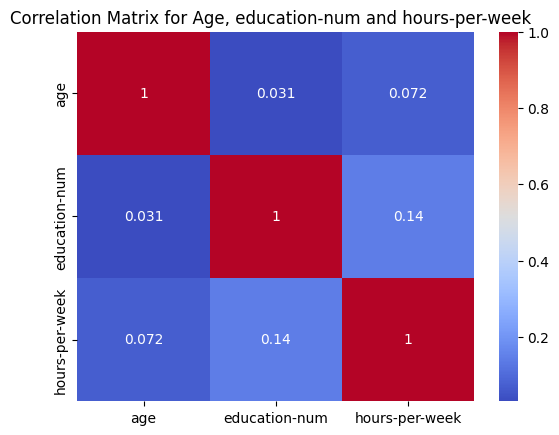

In [79]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Age, education-num and hours-per-week  ')
plt.show()

- age and education-num (0.031): Very Week positve Correlation as Age increases eduction level will not chnage
- age and hours-per-week (0.071): Weak Positive, doens make scnece in real lidfe as age increases , a person tends to work a little bit more.
- education-num and hours-per-week (0.14): also Week postive ; as higher education work a bit more,

**Answer:**

2. Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?

In [131]:
male_data = adult_combined[adult_combined['sex'] == 'Male']
female_data = adult_combined[adult_combined['sex'] == 'Female']

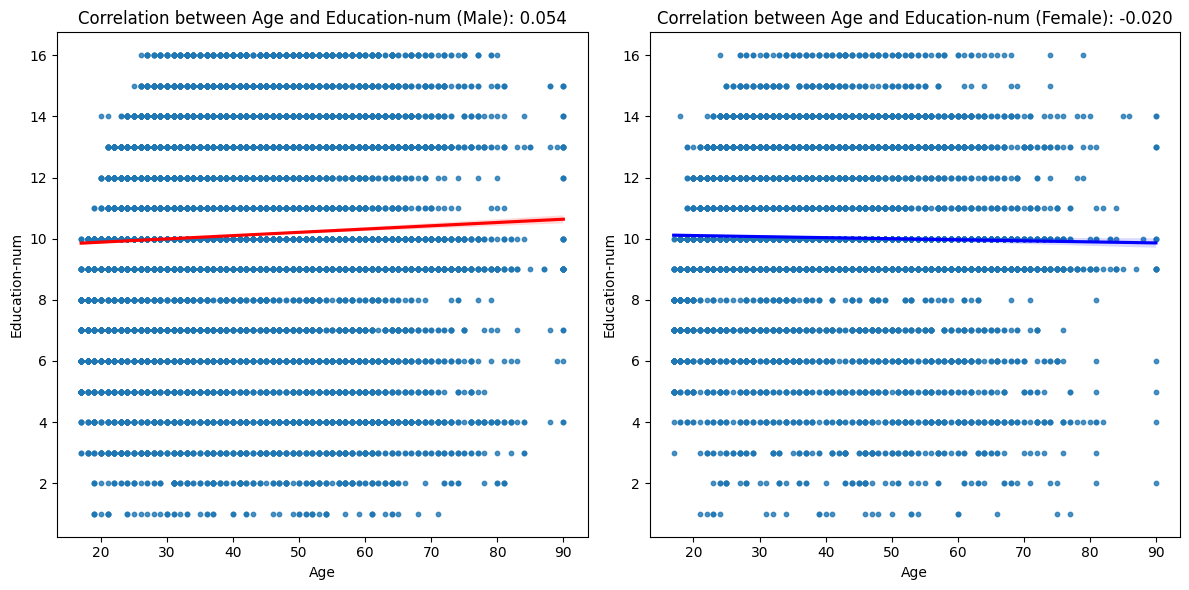

In [132]:
# Calculate correlation values for the plots
male_corr_age_education = male_data[['age', 'education-num']].corr().iloc[0, 1]
female_corr_age_education = female_data[['age', 'education-num']].corr().iloc[0, 1]

# Create subplots for male and female regression plots
plt.figure(figsize=(12, 6))

# Plot for males
plt.subplot(1, 2, 1)
sns.regplot(x='age', y='education-num', data=male_data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title(f"Correlation between Age and Education-num (Male): {male_corr_age_education:.3f}")
plt.xlabel('Age')
plt.ylabel('Education-num')

# Plot for females
plt.subplot(1, 2, 2)
sns.regplot(x='age', y='education-num', data=female_data, scatter_kws={'s': 10}, line_kws={'color': 'blue'})
plt.title(f"Correlation between Age and Education-num (Female): {female_corr_age_education:.3f}")
plt.xlabel('Age')
plt.ylabel('Education-num')

# Adjust layout
plt.tight_layout()
plt.show()


In [134]:
from scipy.stats import pearsonr

edu_hrs_age = [
    ('education-num', 'hours-per-week'),
    ('age', 'hours-per-week'),
    ('education-num', 'age')
]

# Perform Pearson correlation test for edu_hrs_age
for var1, var2 in edu_hrs_age:
    corr, p_value = pearsonr(adult_combined[var1], adult_combined[var2])
    print(f"Correlation between {var1} and {var2}: {corr:.2f}, p-value: {p_value}")
    if p_value < 0.05:
        print("Significant correlation (p < 0.05).")
    else:
        print("No significant correlation (p >= 0.05).")

Correlation between education-num and hours-per-week: 0.14, p-value: 1.3860285325205765e-223
Significant correlation (p < 0.05).
Correlation between age and hours-per-week: 0.07, p-value: 1.8002403626406189e-56
Significant correlation (p < 0.05).
Correlation between education-num and age: 0.03, p-value: 7.955032710144095e-12
Significant correlation (p < 0.05).


the Correlations are weak , teh relationship is not string, predicitons will not be affetced if the variables are chnaged.

In [135]:
# Calculate covariance matrix
cov_matrix_male = male_data[['education-num', 'hours-per-week']].cov()
print("Covariance Matrix for Male:")
print(cov_matrix_male)

cov_matrix_female = female_data[['education-num', 'hours-per-week']].cov()
print("\nCovariance Matrix for Female:")
print(cov_matrix_female)

Covariance Matrix for Male:
                education-num  hours-per-week
education-num        7.079435        4.362717
hours-per-week       4.362717      146.895425

Covariance Matrix for Female:
                education-num  hours-per-week
education-num        5.661763        4.806455
hours-per-week       4.806455      142.775388


1. education-num (Males vs. Females): Education for male is higher than female
2. hours-pre-week (Males vs. Females): Hours per week for male is higher than female
3. Covariance (Males vs. Females): as education level increases, hours per week increases, indicating that female will work more hours than Men when they gain more educationsl level.

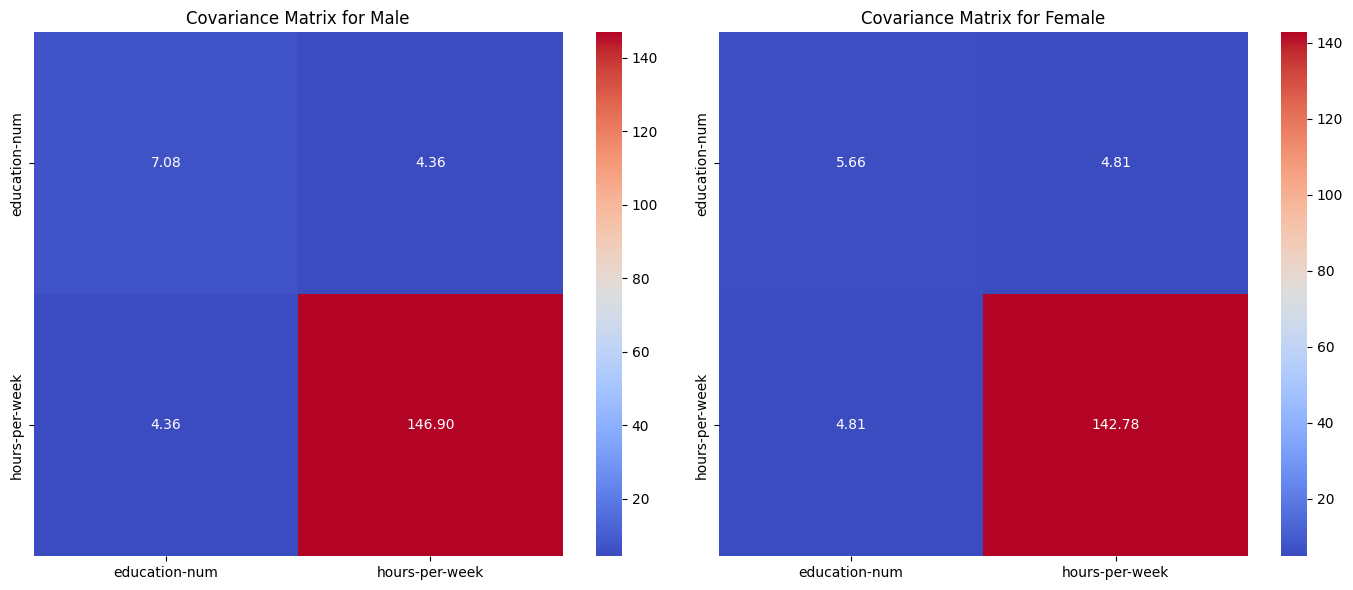

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap for Male covariance matrix
sns.heatmap(cov_matrix_male, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Covariance Matrix for Male")

# Heatmap for Female covariance matrix
sns.heatmap(cov_matrix_female, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Covariance Matrix for Female")

plt.tight_layout()
plt.show()

male_median = adult_combined[adult_combined['sex'] == 'Male']['fnlwgt'].median()
print(f"Median fnlwgt for Male is: {male_median}")
female_median = adult_combined[adult_combined['sex'] == 'Female']['fnlwgt'].median()
print(f"Median fnlwgt for Female is: {female_median}")

adult_combined.groupby('sex')['fnlwgt'].describe()

adult_combined.groupby('sex')['fnlwgt'].describe()

# New section
**Correlation**

Find the correlations between age, **education_num**, and **hours_per_week**.



1.   Do any of the variables appear to be correlated? How did you make your assessment?
2.   Statistically test any variable pairs with a correlation coefficient **> |0.1|** for its difference from 0 and report your result. Is the direction and significance of your finding as expected?
3.  How does the correlation (and its significance) between **education_num** and age compare between male and female participants? Is this expected?
4.   Compute the covariance matrix for **education_num** and **hours_per_week**. What conclusions can you draw from the covariance matrix?

In [54]:
num_duplicates = adult_combined.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 33


In [55]:
adult_combined = adult_combined.drop_duplicates()
adult_combined.reset_index(drop=True, inplace=True)

In [56]:
adult_combined.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_gain_category,capital_loss_category
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Capital Gain,No Capital loss
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,No Capital Gain,No Capital loss
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,No Capital Gain,No Capital loss
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,No Capital Gain,No Capital loss
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,No Capital Gain,No Capital loss


In [57]:
num_duplicates = adult_combined.duplicated().sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [33]:
adult_combined.dropna(inplace=True)

**Changing " Income " to Integer**

In [58]:
print(adult_combined['income'].unique())

['<=50K' '>50K' '<=50K.' '>50K.']


In [59]:
adult_combined['income'] = adult_combined['income'].replace({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})
print(adult_combined['income'].unique())

[0 1]


<ipython-input-59-96831b2ac89d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult_combined['income'] = adult_combined['income'].replace({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})


In [60]:
print(adult_combined['income'].unique())

[0 1]


In [61]:
adult_combined.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_gain_category,capital_loss_category
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,Capital Gain,No Capital loss
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,No Capital Gain,No Capital loss
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,No Capital Gain,No Capital loss
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,No Capital Gain,No Capital loss
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,No Capital Gain,No Capital loss


In [62]:
adult_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48809 entries, 0 to 48808
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    48809 non-null  int64   
 1   workclass              48809 non-null  object  
 2   fnlwgt                 47360 non-null  float64 
 3   education              48809 non-null  object  
 4   education-num          48809 non-null  int64   
 5   marital-status         48809 non-null  object  
 6   occupation             48809 non-null  object  
 7   relationship           48809 non-null  object  
 8   race                   48809 non-null  object  
 9   sex                    48809 non-null  object  
 10  capital-gain           48809 non-null  int64   
 11  capital-loss           48809 non-null  int64   
 12  hours-per-week         48809 non-null  int64   
 13  native-country         48809 non-null  object  
 14  income                 48809 non-null 

In [164]:
#adult_combined.drop(['sex_numeric', 'sex_Male'], axis=1, inplace=True)

In [169]:
#adult_combined.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,income,capital_gain_category,capital_loss_category
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,0,Capital Gain,No Capital loss
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,0,No Capital Gain,No Capital loss
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,0,No Capital Gain,No Capital loss
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,0,No Capital Gain,No Capital loss
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,0,No Capital Gain,No Capital loss


In [63]:
adult_combined['sex'].value_counts()

,count
sex,
Male,32627
Female,16182


In [64]:
adult_combined['sex'] = adult_combined['sex'].replace({'Male': 0,'Female': 1})
print(adult_combined['sex'].unique())

[0 1]


<ipython-input-64-b8c8b73e572a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adult_combined['sex'] = adult_combined['sex'].replace({'Male': 0,'Female': 1})


In [65]:
adult_combined['sex'].value_counts()

,count
sex,
0,32627
1,16182


In [66]:
adult_combined.dropna(inplace=True)


In [67]:
print(adult_combined.isna().sum())

age                      0
workclass                0
fnlwgt                   0
education                0
education-num            0
marital-status           0
occupation               0
relationship             0
race                     0
sex                      0
capital-gain             0
capital-loss             0
hours-per-week           0
native-country           0
income                   0
capital_gain_category    0
capital_loss_category    0
dtype: int64


In [68]:
adult_combined.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,capital_gain_category,capital_loss_category
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0,Capital Gain,No Capital loss
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0,No Capital Gain,No Capital loss
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0,No Capital Gain,No Capital loss
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0,No Capital Gain,No Capital loss
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,Cuba,0,No Capital Gain,No Capital loss


In [69]:
adult_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47360 entries, 0 to 48808
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    47360 non-null  int64   
 1   workclass              47360 non-null  object  
 2   fnlwgt                 47360 non-null  float64 
 3   education              47360 non-null  object  
 4   education-num          47360 non-null  int64   
 5   marital-status         47360 non-null  object  
 6   occupation             47360 non-null  object  
 7   relationship           47360 non-null  object  
 8   race                   47360 non-null  object  
 9   sex                    47360 non-null  int64   
 10  capital-gain           47360 non-null  int64   
 11  capital-loss           47360 non-null  int64   
 12  hours-per-week         47360 non-null  int64   
 13  native-country         47360 non-null  object  
 14  income                 47360 non-null  int6

**Model 1**


In [96]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: WLS for sex predicting hours-per-week
X1 = adult_combined[['sex']]
y1 = adult_combined['hours-per-week']
X1 = sm.add_constant(X1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = sm.WLS(y1_train, X1_train, weights=np.ones_like(y1_train))
results1 = model1.fit()
y1_pred = results1.predict(X1_test)
print("Model 1 Summary:\n", results1.summary())

Model 1 Summary:
                             WLS Regression Results                            
Dep. Variable:         hours-per-week   R-squared:                       0.052
Model:                            WLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2078.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:11:37   Log-Likelihood:            -1.4808e+05
No. Observations:               37888   AIC:                         2.962e+05
Df Residuals:                   37886   BIC:                         2.962e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.4580      0.076  

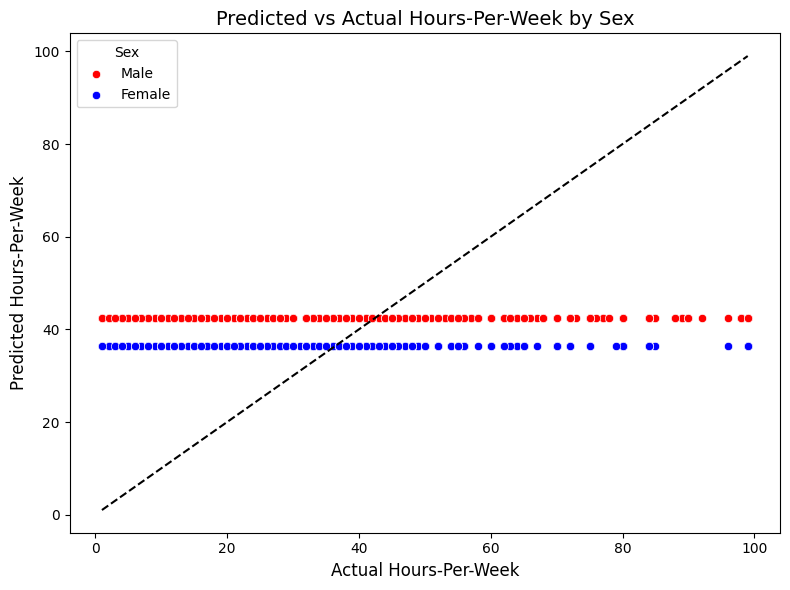

In [98]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y1_test[X1_test['sex'] == 0], y=y1_pred[X1_test['sex'] == 0], color='red', label='Male')
sns.scatterplot(x=y1_test[X1_test['sex'] == 1], y=y1_pred[X1_test['sex'] == 1], color='blue', label='Female')

plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], color='black', linestyle='--')

plt.title('Predicted vs Actual Hours-Per-Week by Sex', fontsize=14)
plt.xlabel('Actual Hours-Per-Week', fontsize=12)
plt.ylabel('Predicted Hours-Per-Week', fontsize=12)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

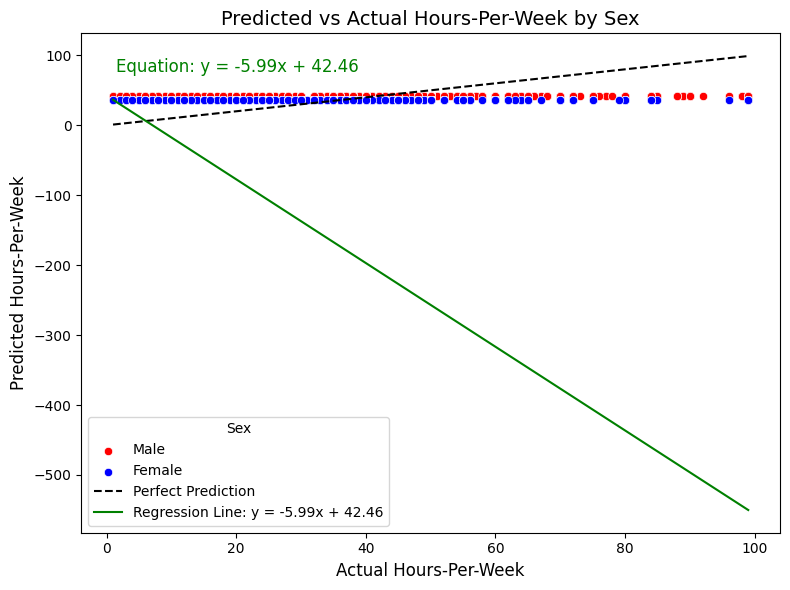

In [99]:
# Get the regression equation (slope and intercept)
intercept, slope = results1.params

# Plot Predicted vs Actual values for hours-per-week, differentiated by sex
plt.figure(figsize=(8, 6))

# Scatter plot for males (sex = 0) in red
sns.scatterplot(x=y1_test[X1_test['sex'] == 0], y=y1_pred[X1_test['sex'] == 0], color='red', label='Male')

# Scatter plot for females (sex = 1) in blue
sns.scatterplot(x=y1_test[X1_test['sex'] == 1], y=y1_pred[X1_test['sex'] == 1], color='blue', label='Female')

# Line for perfect prediction
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], color='black', linestyle='--', label='Perfect Prediction')

# Add regression line: y = mx + b, where m = slope, b = intercept
x_values = np.linspace(y1_test.min(), y1_test.max(), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='green', linestyle='-', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

# Annotate the regression equation on the plot
plt.text(0.05, 0.95, f'Equation: y = {slope:.2f}x + {intercept:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='green')

# Title and labels
plt.title('Predicted vs Actual Hours-Per-Week by Sex', fontsize=14)
plt.xlabel('Actual Hours-Per-Week', fontsize=12)
plt.ylabel('Predicted Hours-Per-Week', fontsize=12)

# Show legend
plt.legend(title='Sex')

# Tight layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()

Analyzing the WLS is that Male works 42.459 Hours per week as an average ,
while women work less in if almost 6 hour

the Regression Equation: y=-5.99x - 42.46


**Model 2 adding Educaation-num,**

In [100]:
# Model 2: WLS for sex predicting education-num
X2 = adult_combined[['sex','hours-per-week']]
y2 = adult_combined['education-num']
X2 = sm.add_constant(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = sm.WLS(y2_train, X2_train, weights=np.ones_like(y2_train))
results2 = model2.fit()
y2_pred = results2.predict(X2_test)
print("Model 2 Summary:\n", results2.summary())

Model 2 Summary:
                             WLS Regression Results                            
Dep. Variable:          education-num   R-squared:                       0.021
Model:                            WLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     404.2
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.99e-174
Time:                        08:19:31   Log-Likelihood:                -88948.
No. Observations:               37888   AIC:                         1.779e+05
Df Residuals:                   37885   BIC:                         1.779e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.8064 

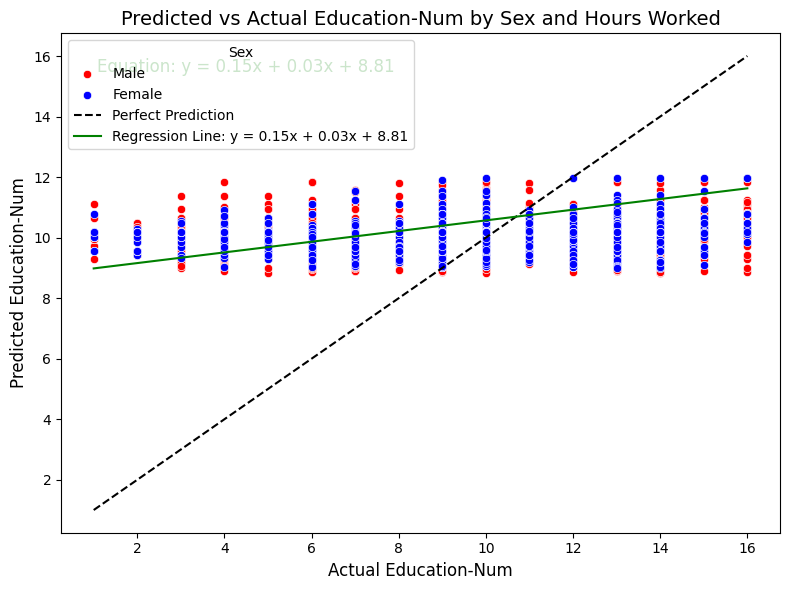

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the regression equation (slope and intercept) for Model 2
intercept2, sex_slope, hours_slope = results2.params

# Plot Predicted vs Actual values for education-num, differentiated by sex
plt.figure(figsize=(8, 6))

# Scatter plot for males (sex = 0) in red
sns.scatterplot(x=y2_test[X2_test['sex'] == 0], y=y2_pred[X2_test['sex'] == 0], color='red', label='Male')

# Scatter plot for females (sex = 1) in blue
sns.scatterplot(x=y2_test[X2_test['sex'] == 1], y=y2_pred[X2_test['sex'] == 1], color='blue', label='Female')

# Line for perfect prediction
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], color='black', linestyle='--', label='Perfect Prediction')

# Add regression line: y = mx + b, where m = slope and b = intercept
x_values = np.linspace(y2_test.min(), y2_test.max(), 100)
y_values = sex_slope * x_values + hours_slope * x_values + intercept2
plt.plot(x_values, y_values, color='green', linestyle='-', label=f'Regression Line: y = {sex_slope:.2f}x + {hours_slope:.2f}x + {intercept2:.2f}')

# Annotate the regression equation on the plot
plt.text(0.05, 0.95, f'Equation: y = {sex_slope:.2f}x + {hours_slope:.2f}x + {intercept2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='green')

# Title and labels
plt.title('Predicted vs Actual Education-Num by Sex and Hours Worked', fontsize=14)
plt.xlabel('Actual Education-Num', fontsize=12)
plt.ylabel('Predicted Education-Num', fontsize=12)

# Show legend
plt.legend(title='Sex')

# Tight layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()


Male  increase with 0.145 in Education compared to Female , as well Hours per week increases to 0.0306
the Regressiotn Equation: y=-0.15x + 0.03x +8.81

**Model 3 adding Income**

In [85]:
# Model 3: Adding Income
X3 = adult_combined[['sex','hours-per-week','education-num']]
y3 = adult_combined['income']
X3 = sm.add_constant(X3)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
model3 = sm.WLS(y3_train, X3_train, weights=np.ones_like(y3_train))
results3 = model3.fit()
y3_pred = results3.predict(X3_test)
print("Model 3 Summary:\n", results3.summary())

Model 3 Summary:
                             WLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.175
Model:                            WLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     2670.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:01:12   Log-Likelihood:                -17975.
No. Observations:               37888   AIC:                         3.596e+04
Df Residuals:                   37884   BIC:                         3.599e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4284 

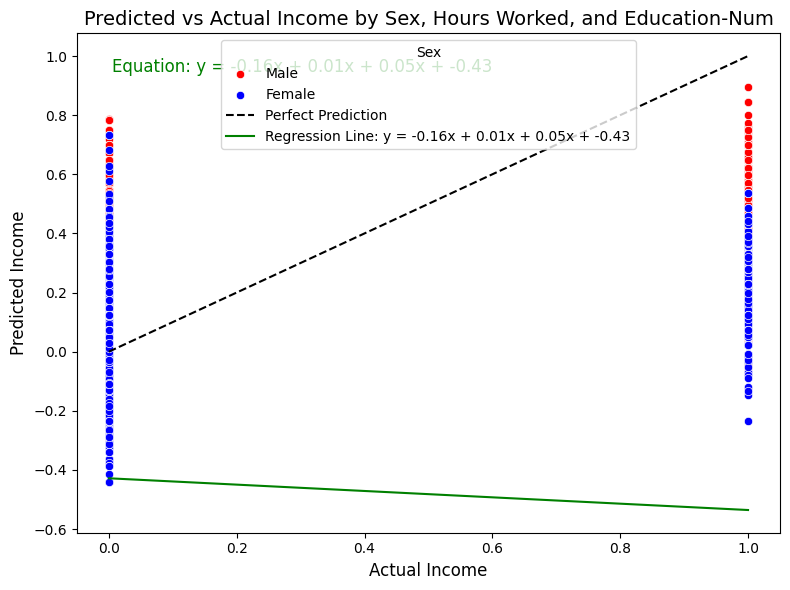

In [102]:
# Get the regression equation (slope and intercept) for Model 3
intercept3, sex_slope3, hours_slope3, edu_slope3 = results3.params

# Plot Predicted vs Actual values for income, differentiated by sex
plt.figure(figsize=(8, 6))

# Scatter plot for males (sex = 0) in red
sns.scatterplot(x=y3_test[X3_test['sex'] == 0], y=y3_pred[X3_test['sex'] == 0], color='red', label='Male')

# Scatter plot for females (sex = 1) in blue
sns.scatterplot(x=y3_test[X3_test['sex'] == 1], y=y3_pred[X3_test['sex'] == 1], color='blue', label='Female')

# Line for perfect prediction
plt.plot([y3_test.min(), y3_test.max()], [y3_test.min(), y3_test.max()], color='black', linestyle='--', label='Perfect Prediction')

# Add regression line: y = mx + b, where m = slope and b = intercept
x_values = np.linspace(y3_test.min(), y3_test.max(), 100)
y_values = sex_slope3 * x_values + hours_slope3 * x_values + edu_slope3 * x_values + intercept3
plt.plot(x_values, y_values, color='green', linestyle='-', label=f'Regression Line: y = {sex_slope3:.2f}x + {hours_slope3:.2f}x + {edu_slope3:.2f}x + {intercept3:.2f}')

# Annotate the regression equation on the plot
plt.text(0.05, 0.95, f'Equation: y = {sex_slope3:.2f}x + {hours_slope3:.2f}x + {edu_slope3:.2f}x + {intercept3:.2f}',
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='green')

# Title and labels
plt.title('Predicted vs Actual Income by Sex, Hours Worked, and Education-Num', fontsize=14)
plt.xlabel('Actual Income', fontsize=12)
plt.ylabel('Predicted Income', fontsize=12)

# Show legend
plt.legend(title='Sex')

# Tight layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()

the Regressiotn Equation: y=-0.16x + 0.01x +0.05x +(-0.43)

In [104]:
# Create a summary dataframe to compare all models
model_comparison = pd.DataFrame({
    'Model': ['Model 1 (with hours-per-week)', 'Model 2 (adding education-num)', 'Model 3 (adding income)'],
    'R-squared': [results1.rsquared, results2.rsquared, results3.rsquared],
    'Adj. R-squared': [results1.rsquared_adj, results2.rsquared_adj, results3.rsquared_adj],
    'F-statistic': [results1.fvalue, results2.fvalue, results3.fvalue],
    'P-value (F-statistic)': [results1.f_pvalue, results2.f_pvalue, results3.f_pvalue],
    'MSE (Mean Squared Error)': [
        mean_squared_error(y1_test, results1.predict(X1_test)),
        mean_squared_error(y2_test, results2.predict(X2_test)),
        mean_squared_error(y3_test, results3.predict(X3_test))
    ]
})
model_comparison

,Model,R-squared,Adj. R-squared,F-statistic,P-value (F-statistic),MSE (Mean Squared Error)
0,Model 1 (with hours-per-week),0.051996,0.051971,2077.972828,0.000000e+00,148.839456
1,Model 2 (adding education-num),0.020893,0.020841,404.212335,1.993336e-174,6.497004
2,Model 3 (adding income),0.174531,0.174466,2669.978669,0.000000e+00,0.148673


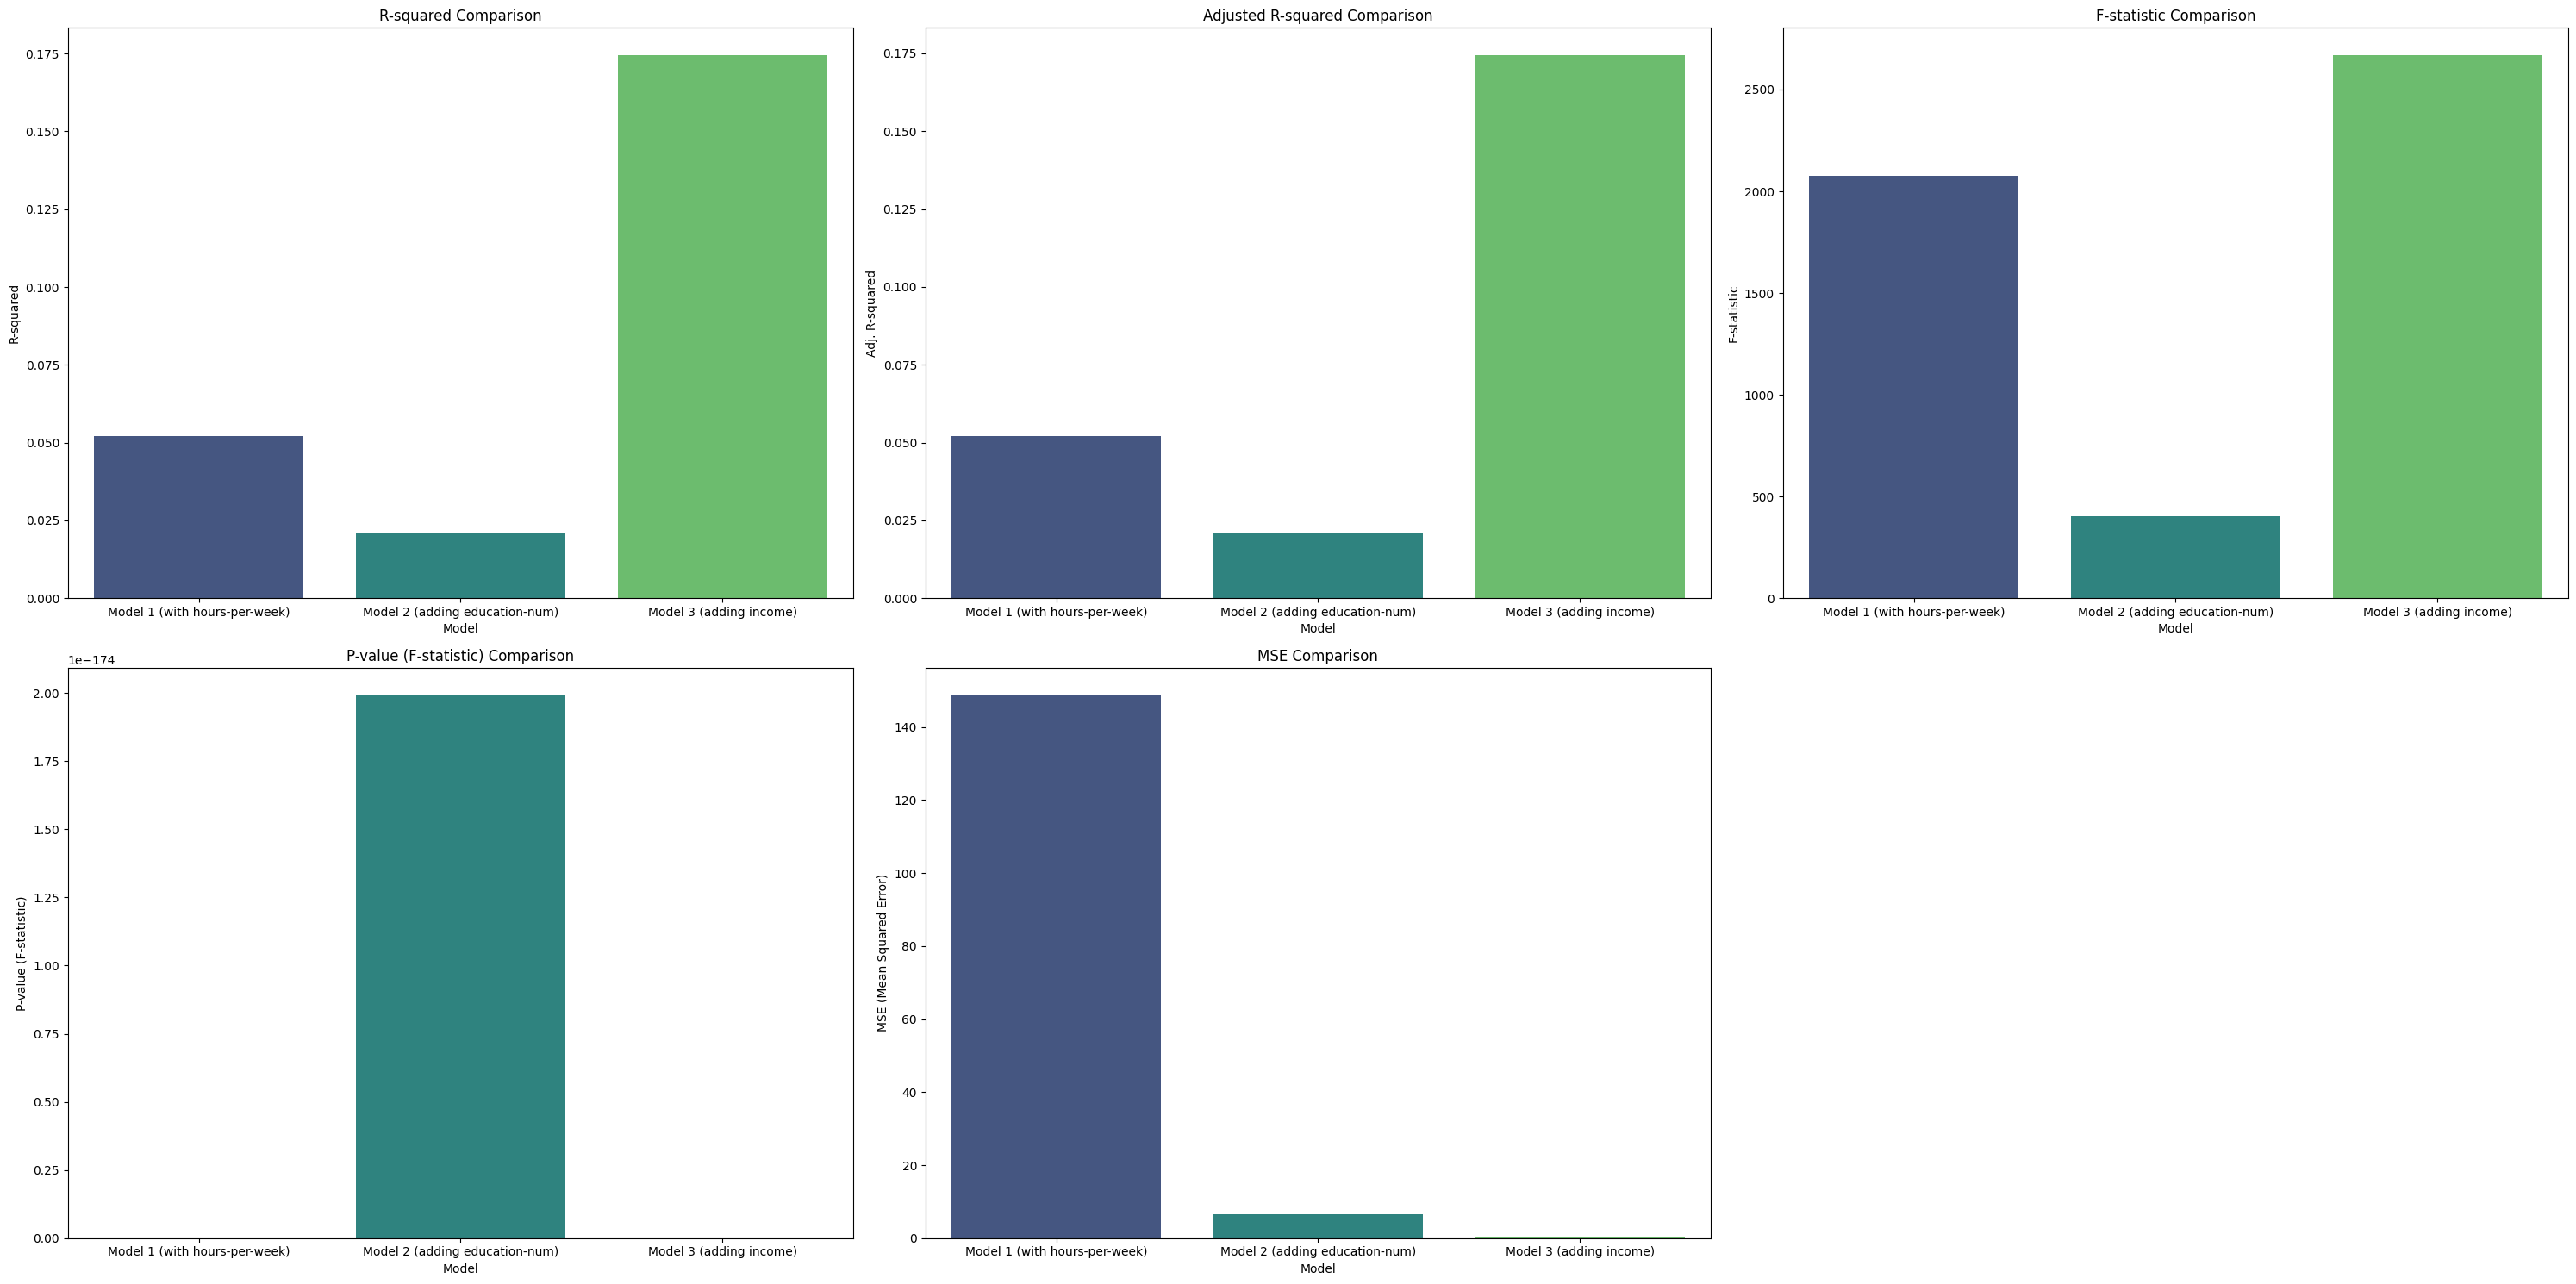

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a summary dataframe to compare all models
model_comparison = pd.DataFrame({
    'Model': ['Model 1 (with hours-per-week)', 'Model 2 (adding education-num)', 'Model 3 (adding income)'],
    'R-squared': [results1.rsquared, results2.rsquared, results3.rsquared],
    'Adj. R-squared': [results1.rsquared_adj, results2.rsquared_adj, results3.rsquared_adj],
    'F-statistic': [results1.fvalue, results2.fvalue, results3.fvalue],
    'P-value (F-statistic)': [results1.f_pvalue, results2.f_pvalue, results3.f_pvalue],
    'MSE (Mean Squared Error)': [
        mean_squared_error(y1_test, results1.predict(X1_test)),
        mean_squared_error(y2_test, results2.predict(X2_test)),
        mean_squared_error(y3_test, results3.predict(X3_test))
    ]
})

# Plotting the histogram to compare the models
plt.figure(figsize=(30, 15))

# Plot R-squared values
plt.subplot(2, 3, 1)
sns.barplot(x='Model', y='R-squared', data=model_comparison, hue='Model', palette='viridis', legend=False)
plt.title('R-squared Comparison')

# Plot Adjusted R-squared values
plt.subplot(2, 3, 2)
sns.barplot(x='Model', y='Adj. R-squared', data=model_comparison, hue='Model', palette='viridis', legend=False)
plt.title('Adjusted R-squared Comparison')

# Plot F-statistic values
plt.subplot(2, 3, 3)
sns.barplot(x='Model', y='F-statistic', data=model_comparison, hue='Model', palette='viridis', legend=False)
plt.title('F-statistic Comparison')

# Plot P-value (F-statistic) values
plt.subplot(2, 3, 4)
sns.barplot(x='Model', y='P-value (F-statistic)', data=model_comparison, hue='Model', palette='viridis', legend=False)
plt.title('P-value (F-statistic) Comparison')

# Plot Mean Squared Error (MSE)
plt.subplot(2, 3, 5)
sns.barplot(x='Model', y='MSE (Mean Squared Error)', data=model_comparison, hue='Model', palette='viridis', legend=False)
plt.title('MSE Comparison')

# Adjust layout for better fit
plt.tight_layout()

# Display the plots
plt.show()


In [94]:
print("\nCoefficient of 'sex' in Model 1 (Without control for Hours per week):", results1.params['sex'])
print("Coefficient of 'sex' in Model 2 (With control for Hours per week and education-num):", results2.params['sex'])
print("Coefficient of 'sex' in Model 2 (With control for Hours per week, education-numand Income", results3.params['sex'])


Coefficient of 'sex' in Model 1 (Without control for Hours per week): -5.985384161511429
Coefficient of 'sex' in Model 2 (With control for Hours per week and education-num): 0.14574424066616776
Coefficient of 'sex' in Model 2 (With control for Hours per week, education-numand Income -0.16398210183977854
